
# 📘 Normalumas, koreliacija ir log-transformacija (naudojant `tips` duomenis)

**Rinkinys:** `seaborn.load_dataset("tips")`  
**Tikslas:**  
1) Atsidaryti `tips` duomenis.  
2) Parodyti du kintamuosius su (beveik) normaliu pasiskirstymu ir jų koreliaciją.  
3) Parodyti pasvirusį kintamąjį ir kaip **log-transformacija** gali pagerinti ryšį.  
4) Pateikti **Markdown** komentarus po kiekvieno žingsnio.


## 1) Bibliotekos ir duomenų įkėlimas

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, shapiro, pearsonr, spearmanr, probplot

import seaborn as sns  # tik duomenų įkėlimui
tips = sns.load_dataset("tips").copy()

print(f"Eilučių skaičius: {len(tips)}")
tips.head()

tips.info()


Eilučių skaičius: 244
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB



**Paaiškinimas:**  
- Pažiūrime kelias pirmas eilutes, kad suprastume stulpelius: `total_bill` (sąskaitos suma), `tip` (arbatpinigiai), `sex`, `smoker`, `day`, `time`, `size`.
### `tips` duomenų rinkinys (`sns.load_dataset("tips")`)

- Tai **Seaborn** bibliotekos įmontuotas duomenų rinkinys, plačiai naudojamas duomenų analizės ir vizualizavimo demonstracijoms. 
- Duomenys surinkti vieno padavėjo per keletą mėnesių vienoje JAV restorano vietoje – iš viso 244 įrašai, 7 stulpeliai.  
- Stulpeliai apima:
  - `total_bill` – sąskaitos suma (tolydus skaičius),
  - `tip` – arbatpinigiai (tolydus),
  - `sex` – lytis (`Male`/`Female`, kategorinis),
  - `smoker` – ar rūkoma (`Yes`/`No`, kategorinis),
  - `day` – savaitės diena (`Thur`, `Fri`, `Sat`, `Sun`, kategorinis),
  - `time` – dienos laikas (`Lunch`/`Dinner`, kategorinis),
  - `size` – svečių skaičius prie stalo (diskretus skaitinis).  
- Puikiai tinka **regresijos**, **EDA**, **vizualizacijų** ir **statistinės analizės** mokymui.


## 2) Pasirenkami kintamieji analizėms

In [3]:

cols = ["total_bill", "tip", "size"]
df = tips[cols].copy()
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00



**Paaiškinimas:**  
Toliau daugiausia dirbsime su **`total_bill`** ir **`tip`**. `size` galėsime naudoti kaip papildomą kintamąjį regresijos linijai ar filtrams, jei reikės.


## 3) Pasiskirstymas: histogramos ir QQ grafikai

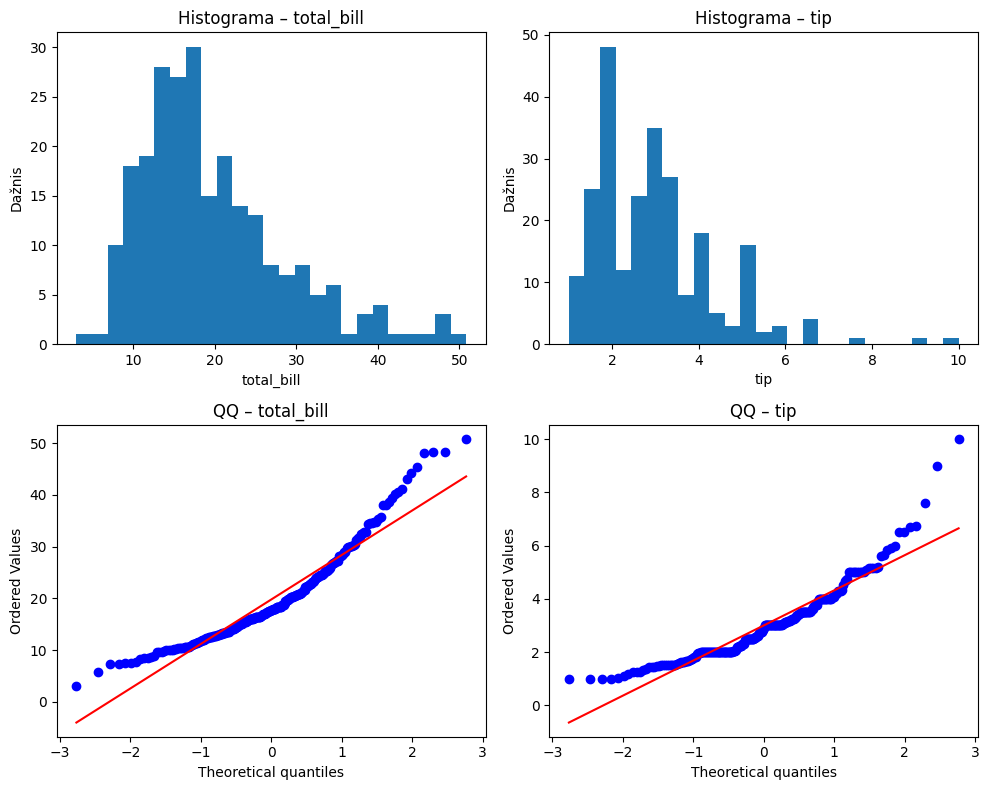

In [20]:

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0,0].hist(df['total_bill'], bins=25)
axes[0,0].set_title("Histograma – total_bill")
axes[0,0].set_xlabel("total_bill"); axes[0,0].set_ylabel("Dažnis")

axes[0,1].hist(df['tip'], bins=25)
axes[0,1].set_title("Histograma – tip")
axes[0,1].set_xlabel("tip"); axes[0,1].set_ylabel("Dažnis")

probplot(df['total_bill'], dist="norm", plot=axes[1,0])
axes[1,0].set_title("QQ – total_bill")

probplot(df['tip'], dist="norm", plot=axes[1,1])
axes[1,1].set_title("QQ – tip")

plt.tight_layout()
plt.show()


In [4]:

# Skew ir Shapiro testas
results = []
for c in ["total_bill", "tip"]:
    vals = df[c].values
    sk = skew(vals, bias=False)
    stat, p = shapiro(vals)
    results.append((c, sk, p))

pd.DataFrame(results, columns=["kintamasis", "skew", "Shapiro_p"])


,kintamasis,skew,Shapiro_p
0,total_bill,1.133213,3.324539e-10
1,tip,1.465451,8.200360e-12



**Interpretacija:**  
- **Skew ≈ 0** rodo simetriškesnį skirstinį; **skew > 0** – teigiamai pasviręs.  
- **Shapiro–Wilk p reikšmė > 0.05**: nėra pagrindo atmesti normalumo hipotezės (duomenys gali būti laikomi normaliais).  
- `total_bill` ir `tip` dažnai yra **teigiamai pasvirę**; toliau pademonstruosime **log-transformaciją**.


## 4) Ryšys tarp `total_bill` ir `tip` (prieš transformaciją)

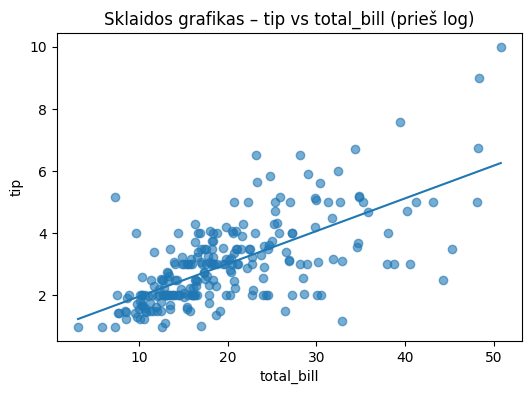

Pearson r=0.676, p=6.69e-34
Spearman r=0.679, p=2.5e-34


In [5]:

x = df['total_bill'].values
y = df['tip'].values

r_p, p_p = pearsonr(x, y)
r_s, p_s = spearmanr(x, y)

m, b = np.polyfit(x, y, 1)
x_line = np.linspace(x.min(), x.max(), 100)
y_line = m * x_line + b

plt.figure(figsize=(6,4))
plt.scatter(x, y, alpha=0.6)
plt.plot(x_line, y_line)
plt.title("Sklaidos grafikas – tip vs total_bill (prieš log)")
plt.xlabel("total_bill"); plt.ylabel("tip")
plt.show()

print(f"Pearson r={r_p:.3f}, p={p_p:.3g}")
print(f"Spearman r={r_s:.3f}, p={p_s:.3g}")



**Interpretacija:**  
- `tip` ir `total_bill` dažniausiai turi **teigiamą ryšį** – didesnė sąskaita → didesni arbatpinigiai.  
- Jei skirstiniai pasvirę, koreliacijos koeficientas gali būti **ne toks stabilus**, o regresijos linija – **labiau veikiama outlier’ių**.


## 5) Log-transformacija pasvirimui mažinti

In [6]:

df['log_total_bill'] = np.log1p(df['total_bill'])
df['log_tip'] = np.log1p(df['tip'])

res_log = []
for c in ['log_total_bill', 'log_tip']:
    vals = df[c].values
    sk = skew(vals, bias=False)
    stat, p = shapiro(vals)
    res_log.append((c, sk, p))
pd.DataFrame(res_log, columns=["kintamasis", "skew", "Shapiro_p"])


,kintamasis,skew,Shapiro_p
0,log_total_bill,-0.010801,0.288433
1,log_tip,0.380494,0.002361


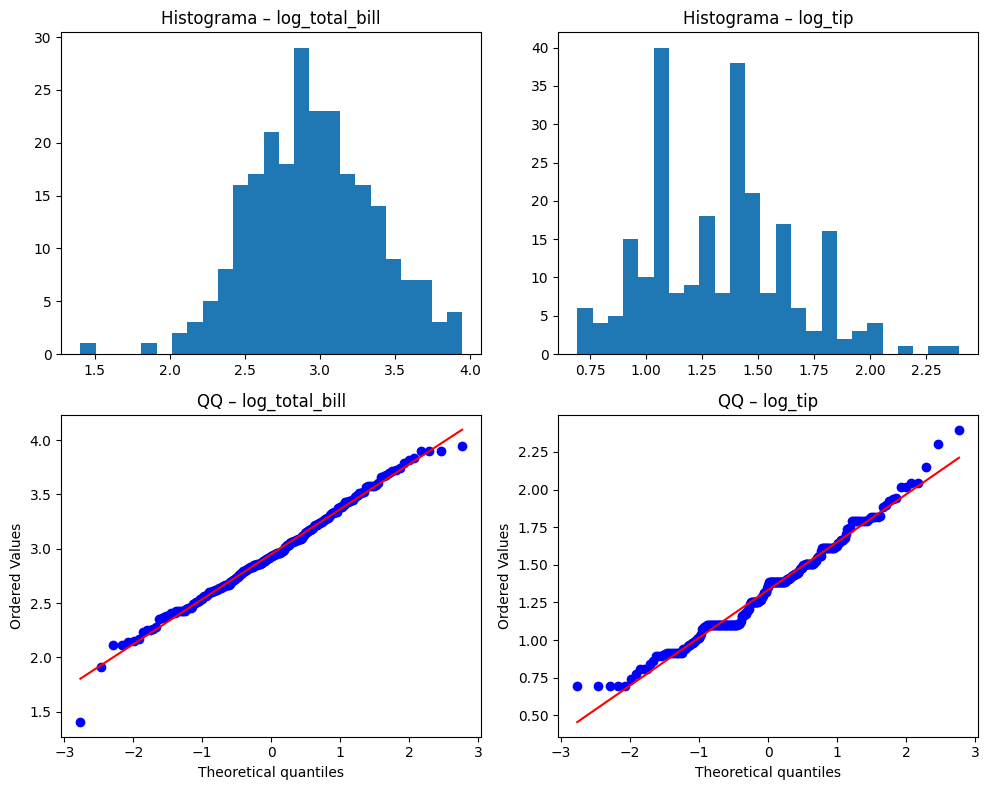

In [7]:

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0,0].hist(df['log_total_bill'], bins=25)
axes[0,0].set_title("Histograma – log_total_bill")

axes[0,1].hist(df['log_tip'], bins=25)
axes[0,1].set_title("Histograma – log_tip")

probplot(df['log_total_bill'], dist="norm", plot=axes[1,0])
axes[1,0].set_title("QQ – log_total_bill")

probplot(df['log_tip'], dist="norm", plot=axes[1,1])
axes[1,1].set_title("QQ – log_tip")

plt.tight_layout()
plt.show()



**Interpretacija:**  
- Po **log-transformacijos** skirstiniai dažnai tampa **simetriškesni**, sumažėja pasvirimas (`skew`).  
- Tai gali pagerinti **koreliacijos** ir **regresijos** modelių stabilumą.


## 6) Ryšys po log-transformacijos

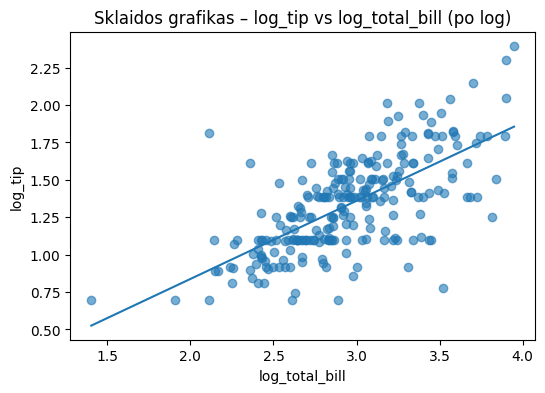

Pearson (po log) r=0.679, p=2.39e-34
Spearman (po log) r=0.679, p=2.5e-34


In [8]:

x2 = df['log_total_bill'].values
y2 = df['log_tip'].values

r_p2, p_p2 = pearsonr(x2, y2)
r_s2, p_s2 = spearmanr(x2, y2)

m2, b2 = np.polyfit(x2, y2, 1)
xl = np.linspace(x2.min(), x2.max(), 100)
yl = m2 * xl + b2

plt.figure(figsize=(6,4))
plt.scatter(x2, y2, alpha=0.6)
plt.plot(xl, yl)
plt.title("Sklaidos grafikas – log_tip vs log_total_bill (po log)")
plt.xlabel("log_total_bill"); plt.ylabel("log_tip")
plt.show()

print(f"Pearson (po log) r={r_p2:.3f}, p={p_p2:.3g}")
print(f"Spearman (po log) r={r_s2:.3f}, p={p_s2:.3g}")



## ✅ Išvados
- `total_bill` ir `tip` turi aiškų **teigiamą ryšį**.  
- Abu kintamieji yra **teigiamai pasvirę**; **log-transformacija** dažnai pagerina normalumą ir ryšio stabilumą.  
- Tiesinė koreliacija (Pearson) remiasi prielaidomis; kai jos pažeidžiamos, verta naudoti **Spearman** arba transformuoti duomenis.



## 7) Automatinis outlier’ių aptikimas (IQR) – `total_bill`, `tip`, `size`
**Metodika:**  
- IQR = Q3 − Q1  
- Apatinė riba = Q1 − 1.5×IQR  
- Viršutinė riba = Q3 + 1.5×IQR


In [9]:

import numpy as np
import pandas as pd

def iqr_bounds(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return q1, q3, iqr, lower, upper

iqr_rows = []
for col in ["total_bill", "tip", "size"]:
    q1, q3, iqr, lower, upper = iqr_bounds(df[col])
    cnt = int(((df[col] < lower) | (df[col] > upper)).sum())
    iqr_rows.append({
        "kintamasis": col,
        "Q1": float(q1), "Q3": float(q3), "IQR": float(iqr),
        "apatinė_riba": float(lower), "viršutinė_riba": float(upper),
        "outlier_skaičius": cnt
    })

pd.DataFrame(iqr_rows)


,kintamasis,Q1,Q3,IQR,apatinė_riba,viršutinė_riba,outlier_skaičius
0,total_bill,13.3475,24.1275,10.7800,-2.82250,40.29750,9
1,tip,2.0000,3.5625,1.5625,-0.34375,5.90625,9
2,size,2.0000,3.0000,1.0000,0.50000,4.50000,9



## 8) Likučių (residualų) analizė – prieš ir po log-transformacijos

**Tikslas:** patikrinti, ar likučiai yra (1) be aiškių struktūrų, (2) apytiksliai normalūs.  
Tai svarbu tiesinei regresijai ir p-reikšmių patikimumui.


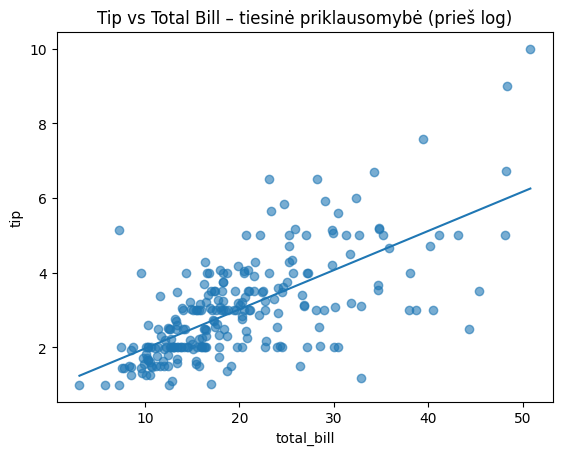

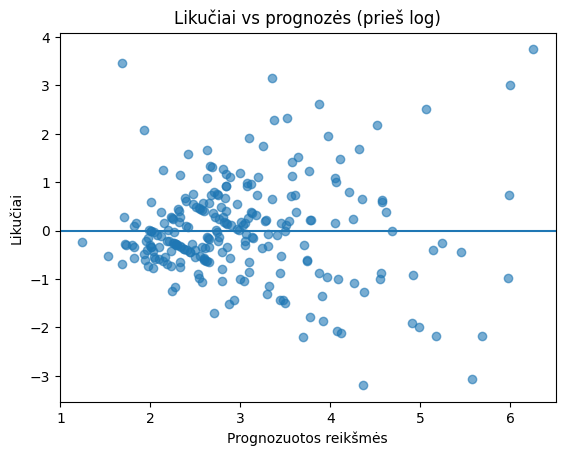

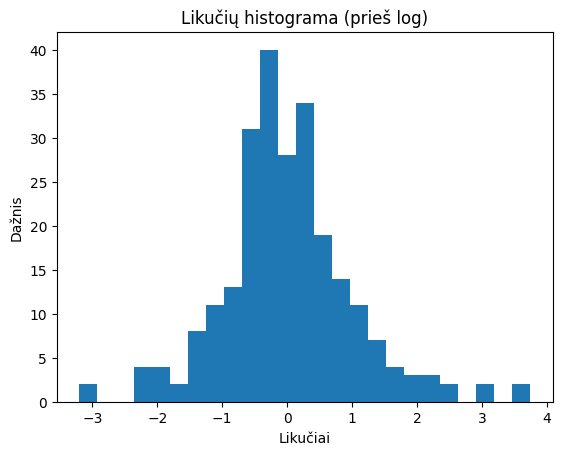

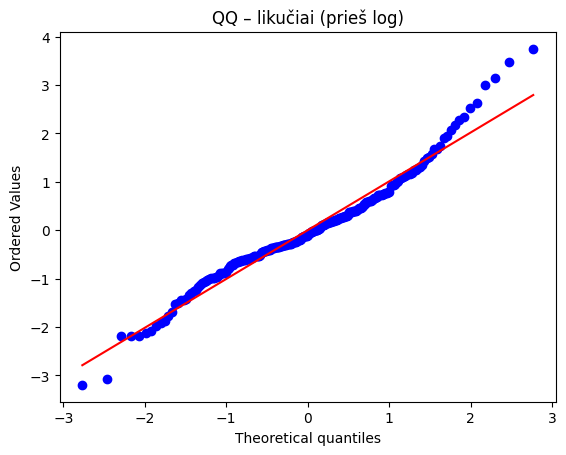

Shapiro p (likučiai prieš log): 0.0000


In [10]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import probplot, shapiro

# Original scale
x = df['total_bill'].values
y = df['tip'].values
m, b = np.polyfit(x, y, 1)
y_hat = m * x + b
res = y - y_hat

# 1) Fitted vs Actual (scatter) – original
plt.figure()
plt.scatter(x, y, alpha=0.6)
plt.plot(np.linspace(x.min(), x.max(), 100),
         m*np.linspace(x.min(), x.max(), 100) + b)
plt.title("Tip vs Total Bill – tiesinė priklausomybė (prieš log)")
plt.xlabel("total_bill"); plt.ylabel("tip")
plt.show()

# 2) Residuals vs Fitted – original
plt.figure()
plt.scatter(y_hat, res, alpha=0.6)
plt.axhline(0)
plt.title("Likučiai vs prognozės (prieš log)")
plt.xlabel("Prognozuotos reikšmės"); plt.ylabel("Likučiai")
plt.show()

# 3) Residuals histogram – original
plt.figure()
plt.hist(res, bins=25)
plt.title("Likučių histograma (prieš log)")
plt.xlabel("Likučiai"); plt.ylabel("Dažnis")
plt.show()

# 4) QQ plot – original
plt.figure()
probplot(res, dist="norm", plot=plt)
plt.title("QQ – likučiai (prieš log)")
plt.show()

# Normalumo testas likučiams (Shapiro)
stat_o, p_o = shapiro(res)
print(f"Shapiro p (likučiai prieš log): {p_o:.4f}")


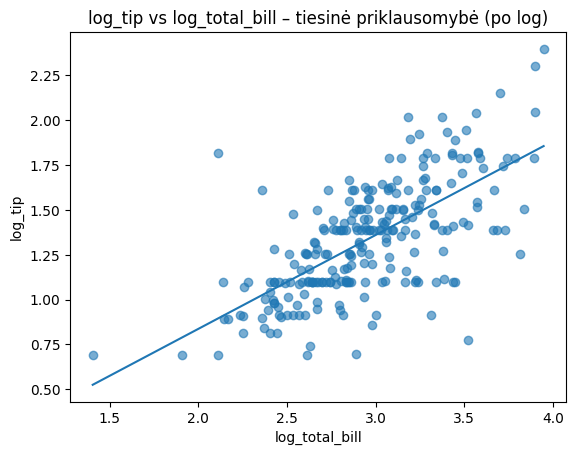

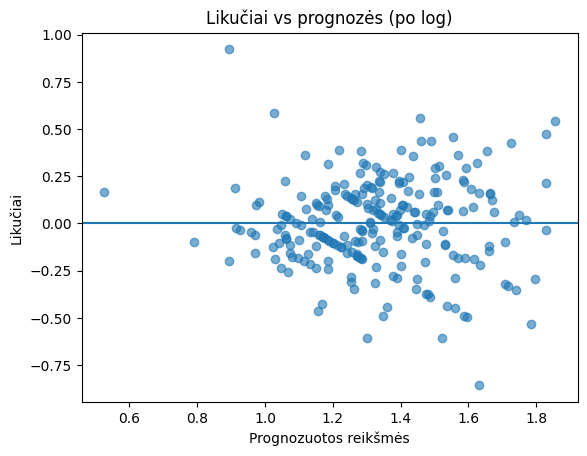

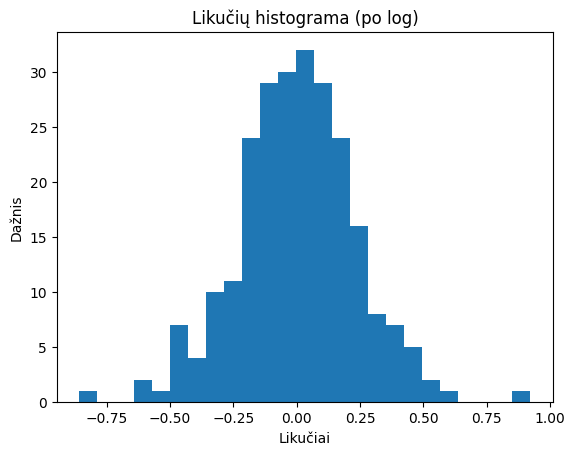

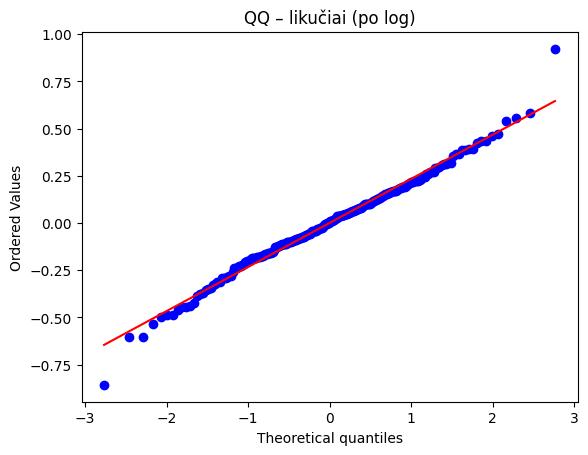

Shapiro p (likučiai po log): 0.0726


In [11]:

# Log scale
x2 = df['log_total_bill'].values
y2 = df['log_tip'].values
m2, b2 = np.polyfit(x2, y2, 1)
y_hat2 = m2 * x2 + b2
res2 = y2 - y_hat2

# 1) Fitted vs Actual – log
plt.figure()
plt.scatter(x2, y2, alpha=0.6)
plt.plot(np.linspace(x2.min(), x2.max(), 100),
         m2*np.linspace(x2.min(), x2.max(), 100) + b2)
plt.title("log_tip vs log_total_bill – tiesinė priklausomybė (po log)")
plt.xlabel("log_total_bill"); plt.ylabel("log_tip")
plt.show()

# 2) Residuals vs Fitted – log
plt.figure()
plt.scatter(y_hat2, res2, alpha=0.6)
plt.axhline(0)
plt.title("Likučiai vs prognozės (po log)")
plt.xlabel("Prognozuotos reikšmės"); plt.ylabel("Likučiai")
plt.show()

# 3) Residuals histogram – log
plt.figure()
plt.hist(res2, bins=25)
plt.title("Likučių histograma (po log)")
plt.xlabel("Likučiai"); plt.ylabel("Dažnis")
plt.show()

# 4) QQ plot – log
plt.figure()
probplot(res2, dist="norm", plot=plt)
plt.title("QQ – likučiai (po log)")
plt.show()

# Normalumo testas likučiams (Shapiro)
stat_l, p_l = shapiro(res2)
print(f"Shapiro p (likučiai po log): {p_l:.4f}")


In [14]:
# A) 1. Apskaičiuojame likučius (po log-transformacijos)
x2 = df['log_total_bill'].values
y2 = df['log_tip'].values

m2, b2 = np.polyfit(x2, y2, 1)
y_hat2 = m2 * x2 + b2
res2 = y2 - y_hat2

# 2. Sudarome lentelę su didžiausiais |likučiais|
tbl = (
    pd.DataFrame({
        "index": df.index,
        "total_bill": df["total_bill"],
        "tip": df["tip"],
        "log_total_bill": df["log_total_bill"],
        "log_tip": df["log_tip"],
        "residual": res2
    })
    .assign(abs_res=lambda t: t["residual"].abs())
    .sort_values("abs_res", ascending=False)
)

top2 = tbl.head(2)      # čia – „matomos 2 išskirtys“
top2

,index,total_bill,tip,log_total_bill,log_tip,residual,abs_res
172,172,7.25,5.15,2.110213,1.816452,0.921904,0.921904
237,237,32.83,1.17,3.521348,0.774727,-0.857899,0.857899


In [15]:
# B) Pašaliname tas 2 eilutes ir perdarome modelį
out_idx = top2["index"].tolist()
df_clean = df.drop(index=out_idx).copy()

# Perfitinam
x2c = df_clean['log_total_bill'].values
y2c = df_clean['log_tip'].values
m2c, b2c = np.polyfit(x2c, y2c, 1)
y_hat2c = m2c * x2c + b2c
res2c = y2c - y_hat2c

# Greita diagnostika: Shapiro p reikšmė ir nauja koreliacija
from scipy.stats import shapiro, pearsonr
print("Shapiro p (likučiai po išmetimo):", shapiro(res2c)[1])
print("Pearson r (po išmetimo):", pearsonr(x2c, y2c)[0])

Shapiro p (likučiai po išmetimo): 0.5166496149198789
Pearson r (po išmetimo): 0.7187509447588475


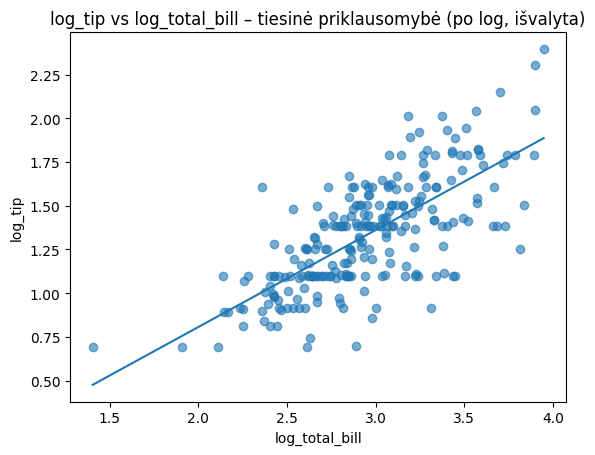

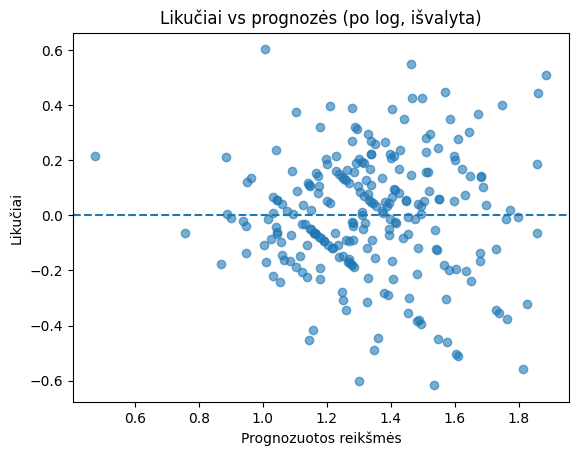

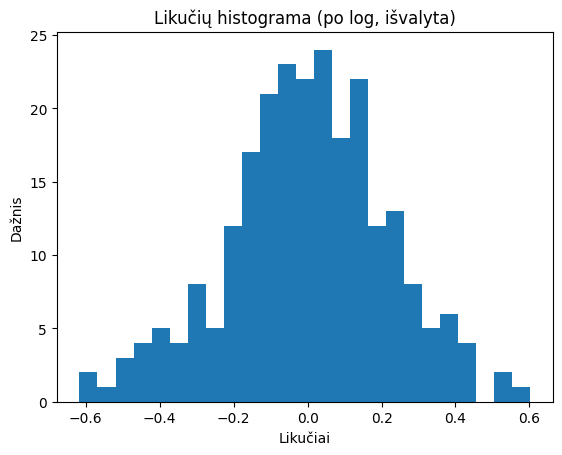

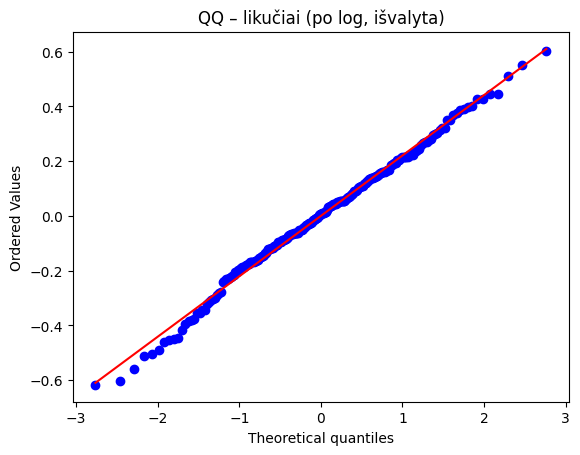

In [ ]:
# # --- A. Identify top-2 outliers by absolute residuals (po log) ---
# tbl = (
#     pd.DataFrame({
#         "idx": df.index,
#         "total_bill": df["total_bill"],
#         "tip": df["tip"],
#         "log_total_bill": df["log_total_bill"],
#         "log_tip": df["log_tip"],
#         "residual": res2
#     })
#     .assign(abs_res=lambda t: t["residual"].abs())
#     .sort_values("abs_res", ascending=False)
# )

# top2 = tbl.head(2)
# print("Top-2 išskirtys pagal |likučius|:")
# display(top2[["idx","total_bill","tip","log_total_bill","log_tip","residual","abs_res"]])

# # --- B. Drop those rows and refit on cleaned data ---
# drop_idx = top2["idx"].tolist()
# df_clean = df.drop(index=drop_idx).copy()

# x2c = df_clean['log_total_bill'].values
# y2c = df_clean['log_tip'].values
# m2c, b2c = np.polyfit(x2c, y2c, 1)
# y_hat2c = m2c * x2c + b2c
# res2c = y2c - y_hat2c

# # --- C. Before/after quick stats ---
# from scipy.stats import shapiro, pearsonr

# p_before = shapiro(res2)[1]
# p_after  = shapiro(res2c)[1]
# r_before = pearsonr(x2, y2)[0]
# r_after  = pearsonr(x2c, y2c)[0]

# print(f"Pašalintos eilutės: {drop_idx}")
# print(f"Shapiro p (prieš): {p_before:.4f} | (po): {p_after:.4f}")
# print(f"Pearson r (prieš): {r_before:.4f} | (po): {r_after:.4f}")

# --- D. Redraw diagnostics (po log) on CLEANED data ---

# 1) Fitted vs Actual – log (clean)
plt.figure()
plt.scatter(x2c, y2c, alpha=0.6)
x_line_c = np.linspace(x2c.min(), x2c.max(), 100)
plt.plot(x_line_c, m2c*x_line_c + b2c)
plt.title("log_tip vs log_total_bill - tiesinė priklausomybė (po log, išvalyta)")
plt.xlabel("log_total_bill"); plt.ylabel("log_tip")
plt.show()

# 2) Residuals vs Fitted – log (clean)
plt.figure()
plt.scatter(y_hat2c, res2c, alpha=0.6)
plt.axhline(0, linestyle="--")
plt.title("Likučiai vs prognozės (po log, išvalyta)")
plt.xlabel("Prognozuotos reikšmės"); plt.ylabel("Likučiai")
plt.show()

# 3) Residuals histogram – log (clean)
plt.figure()
plt.hist(res2c, bins=25)
plt.title("Likučių histograma (po log, išvalyta)")
plt.xlabel("Likučiai"); plt.ylabel("Dažnis")
plt.show()

# 4) QQ plot – log (clean)
plt.figure()
probplot(res2c, dist="norm", plot=plt)
plt.title("QQ – likučiai (po log, išvalyta)")
plt.show()


**Interpretacija:**  
- Jei **likučiai vs prognozės** neturi aiškios struktūros ir yra aplink 0 – tai geras ženklas.  
- **Histograma** ir **QQ** grafikai padeda įvertinti normalumą. Jei po log-transformacijos likučiai atrodo normalesni (ir p-reikšmė didesnė), modelio prielaidos labiau tenkinamos.



## 9) Mini‑užduotys 
1. Apskaičiuokite IQR ribas `total_bill` ir `tip`, suskaičiuokite outlier’ių skaičių **ir pateikite procentą** nuo visų eilučių.  
2. Pritaikykite **sqrt** transformaciją `tip` (be log) ir pakartokite: histograma, QQ, Pearson r su `total_bill`. Palyginkite su log rezultatais.  
3. Pašalinkite reikšmes už IQR ribų (tik `total_bill`), perskaičiuokite Pearson r su `tip`. Ar ryšys pasikeitė?  
4. Naudodami `size` kaip papildomą kintamąjį, pabandykite **stratifikuoti** duomenis (pvz., `size` ∈ {2,3,4+}) ir palyginkite Pearson r kiekvienai grupei.



## 10) Automatinis outlier’ių žymėjimas sklaidos grafike

Naudojame IQR metodą `total_bill` kintamajam ir pažymime outlier’ius kita spalva grafike.


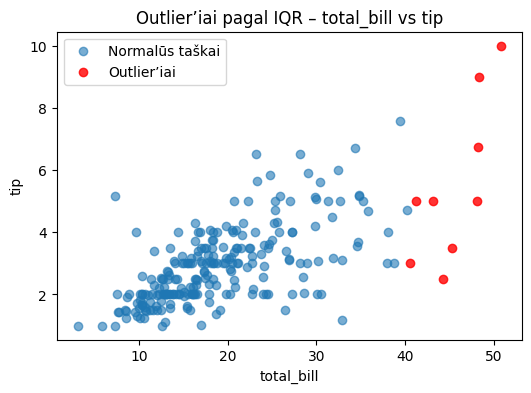

In [12]:

# IQR ribos total_bill
q1, q3 = df['total_bill'].quantile([0.25, 0.75])
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Outlier boolean mask
outliers_mask = (df['total_bill'] < lower) | (df['total_bill'] > upper)

plt.figure(figsize=(6,4))
plt.scatter(df.loc[~outliers_mask, 'total_bill'],
            df.loc[~outliers_mask, 'tip'],
            alpha=0.6, label="Normalūs taškai")
plt.scatter(df.loc[outliers_mask, 'total_bill'],
            df.loc[outliers_mask, 'tip'],
            color='red', alpha=0.8, label="Outlier’iai")
plt.xlabel("total_bill")
plt.ylabel("tip")
plt.title("Outlier’iai pagal IQR – total_bill vs tip")
plt.legend()
plt.show()



## 11) Koreliacijų palyginimas – originalūs, log ir sqrt transformuoti kintamieji

Palyginame Pearson ir Spearman koreliacijas tarp `total_bill` ir `tip` naudojant:  
1. Originalius duomenis  
2. log1p transformaciją  
3. sqrt transformaciją


In [13]:

# Sqrt transform
df['sqrt_total_bill'] = np.sqrt(df['total_bill'])
df['sqrt_tip'] = np.sqrt(df['tip'])

corr_rows = []

# Original
r_p, _ = pearsonr(df['total_bill'], df['tip'])
r_s, _ = spearmanr(df['total_bill'], df['tip'])
corr_rows.append(['Original', r_p, r_s])

# Log
r_p, _ = pearsonr(df['log_total_bill'], df['log_tip'])
r_s, _ = spearmanr(df['log_total_bill'], df['log_tip'])
corr_rows.append(['Log', r_p, r_s])

# Sqrt
r_p, _ = pearsonr(df['sqrt_total_bill'], df['sqrt_tip'])
r_s, _ = spearmanr(df['sqrt_total_bill'], df['sqrt_tip'])
corr_rows.append(['Sqrt', r_p, r_s])

pd.DataFrame(corr_rows, columns=['Versija', 'Pearson_r', 'Spearman_r'])


,Versija,Pearson_r,Spearman_r
0,Original,0.675734,0.678968
1,Log,0.679116,0.678968
2,Sqrt,0.679499,0.678968


### 📊 Koreliacijų palyginimas – išvados

- **Pearson r**:
  - Originalūs duomenys: `0.6757`
  - Po log transformacijos: `0.6791` (nedidelis padidėjimas)
  - Po sqrt transformacijos: `0.6795` (taip pat nedidelis padidėjimas)
  - **Išvada:** tiek log, tiek sqrt transformacijos **šiek tiek padidina Pearson koreliacijos koeficientą**, o tai gali rodyti, kad pasvirimo sumažinimas padeda linijiniam ryšiui tapti aiškesniam.

- **Spearman r**:
  - Visose versijose vienodas: `0.678968`
  - **Išvada:** Spearman koreliacija **nekinta**, nes transformacijos nekeičia duomenų rangų (tvarkos).

- **Bendra pastaba**:
  - Transformacijos naudingos, jei siekiama pagerinti **Pearson koreliaciją** ir patenkinti **normalumo prielaidą**, tačiau jos **neturi įtakos Spearman koreliacijai**.

### 🔍 Kaip transformacijos padėjo modelyje?

1. **Mažina pasvirimą (skewness)**  
   - Originalūs `total_bill` ir `tip` buvo teigiamai pasvirę (ilga uodega į dešinę).  
   - Log arba sqrt transformacijos „suspaudė“ dideles reikšmes ir „ištempė“ mažesnes, todėl skirstinys tapo simetriškesnis.  
   - Tai artino duomenis prie normalumo, kas yra svarbu **Pearson koreliacijai** ir **tiesinės regresijos** prielaidoms.

2. **Mažina outlier’ių įtaką**  
   - Didelės reikšmės po transformacijos tapo santykinai mažesnės, todėl ekstremalūs taškai nebeturėjo tokios stiprios įtakos tiesės nuolydžiui ir koreliacijos skaičiavimui.

3. **Pagerina linijiškumą**  
   - Jei ryšys tarp kintamųjų originalioje skalėje nėra tiesinis, transformacija gali jį paversti artimesniu tiesinei priklausomybei.  
   - Tai leidžia regresijos modeliui geriau pritaikyti tiesę ir prognozuoti.

4. **Pearson vs Spearman**  
   - **Pearson** vertina linijinį ryšį, todėl jam naudinga, jei duomenys labiau atitinka linijiškumą ir normalumą.  
   - **Spearman** vertina ranginį ryšį, todėl transformacija rangų nekeičia ir rezultatas išlieka identiškas.

---

**Tavo pavyzdyje:**
- Pearson r pakilo nuo `0.6757` → `0.6791` (log) ir `0.6795` (sqrt), nes pasvirimo sumažinimas padarė ryšį šiek tiek tiesiškesnį.  
- Spearman r nesikeitė (`0.678968`), nes rangų tvarka išliko ta pati.